# Customer Lifetime Value
In this notebook we are going to calculate Customer Lifetime Value in Python. This notebook follows the steps of the tutorial made available by DataCamp and DigitalJ2

Source: https://www.datacamp.com/community/tutorials/customer-life-time-value

Source: https://blog.digitalj2.com/a-simple-customer-lifetime-value-formula

In [1]:
# Library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
data = pd.read_csv("./data/data.csv")

In [3]:
# Convert date datatypes
data["today"] = "2020-06-18"
data["today"] = pd.to_datetime(data["today"])

data["last_order_date"] = pd.to_datetime(data["last_order_date"])

data["days_since_order"] = data["today"] - data["last_order_date"]
data["days_since_order"] = data["days_since_order"].astype(str)
data["days_since_order"] = data["days_since_order"].str.split(" ").str[0]

# Change dtypes
data["first_order_date"] = pd.to_datetime(data["first_order_date"])
data["last_order_date"] = pd.to_datetime(data["last_order_date"])
data["days_since_order"] = data["days_since_order"].astype(int)
data["id"] = data["id"].astype(str)

data.head(3)

,first_order_date,last_order_date,orders,quantity,revenue,postal_code,city,country,today,days_since_order,id,order_ids
0,2017-07-25 08:03:53,2017-07-25 08:03:53,4,9,40.57,1509GP,Zaandam,NL,2020-06-18,1058,2239494964570881686,1478727216377870648
1,2018-02-21 20:40:44,2018-02-21 20:40:44,4,7,93.79,2151KV,Nieuw-Vennep,NL,2020-06-18,847,2236530259561204867,7439576930578883431
2,2017-09-26 08:46:32,2017-09-26 08:46:32,5,6,254.50,7361ET,Beekbergen,NL,2020-06-18,995,16345102021806026516,376077500108802426


## Calculating CLV
Here we are going to calculate all necessary variables to to calculate CLTV. The formula we are going to calculate is:

**Customer Value = Average Order Value x Purchase Frequency**

**Customer Lifetime Value = CV * Avg. Lifespan**

**Avg. Lifespan:**
The average customer lifespan is the average number of days between first order date and last order date of all of your customers. Convert the average number of days into years by dividing your number by 365. For example, if you determine that the ACL is 1,277.5 days, this would equate to an ACL of 3.5 years.

In [4]:
# Calculate Average Order Value
data["avg_order_value"] = data["revenue"] / data["orders"]

# Calculate Purchase frequency
number_of_orders = np.sum(data["orders"])
number_of_customers = len(data)
purchase_frequency = number_of_orders / number_of_customers

# Avg. lifespan
data["first_order_date"] = pd.to_datetime(data["first_order_date"])
data["last_order_date"] = pd.to_datetime(data["last_order_date"])
data["avg_life"] = data["last_order_date"] - data["first_order_date"]
data["avg_life"] = data["avg_life"].astype(str)
data["avg_life"] = data["avg_life"].str.split("days").str[0]
data["avg_life"] = data["avg_life"].astype(int)
data["avg_life"] = data["avg_life"] / 365
# data.sort_values("avg_life",ascending=False)
# data["avg_life"].mean()

data["customer_value"] = data["avg_order_value"]*purchase_frequency
data["customer_lifetime_value"] = data["customer_value"] * data["avg_life"]
# data["customer_value"].mean()
data["customer_lifetime_value"].mean()
# data["avg_life"].mean()

0.5756813857859376

In [22]:
# data["clv"] = data["avg_life"] / data["avg_order_value"]
# data["clv"] = data["avg_order_value"] * purchase_frequency
data.sort_values("avg_life",ascending=False)
# data.sort_values("customer_lifetime_value",ascending=False)

,first_order_date,last_order_date,orders,quantity,revenue,postal_code,city,country,today,days_since_order,id,order_ids,avg_order_value,avg_life,customer_value,customer_lifetime_value,purchase_frequency,profit_margin,clv,month_year
22,2017-11-28 22:25:18,2020-04-18 14:22:00,2,2,10.97,1078MJ,Amsterdam,NL,2020-06-18,60,2240778649864075061,4314210098438360105,5.485,2.386301,6.958422,16.604891,0.003922,3.291,6.958422,Apr-2020
81,2018-03-09 22:48:37,2020-04-04 13:28:00,2,4,62.06,2651DA,Berkel en Rodenrijs,NL,2020-06-18,74,13292559878857756386,10135244994446085816,31.030,2.071233,39.365510,81.535138,0.003922,18.618,39.365510,Apr-2020
201,2018-10-23 20:21:13,2020-04-16 16:48:00,2,2,20.40,1093 XR,Amsterdam,NL,2020-06-18,62,3475479159126801608,2445170615160812047,10.200,1.479452,12.940000,19.144110,0.003922,6.120,12.940000,Apr-2020
299,2018-01-12 13:13:17,2019-06-19 17:56:52,2,3,21.40,3882LH,Putten,NL,2020-06-18,364,6824615589328896102,1559040243405769326,10.700,1.432877,13.574314,19.450318,0.003922,6.420,13.574314,Jun-2019
300,2018-04-05 20:11:27,2019-06-23 09:23:40,2,2,52.65,4503AB,Groede,NL,2020-06-18,360,17069179823078769018,9438939873200313418,26.325,1.213699,33.396618,40.533429,0.003922,15.795,33.396618,Jun-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,2018-09-01 14:49:12,2018-09-01 14:49:12,1,1,28.93,4614KV,Bergen op Zoom,NL,2020-06-18,655,2318968881616765444,14229560194086018157,28.930,0.000000,36.701392,0.000000,0.001961,8.679,36.701392,Sep-2018
173,2018-08-31 18:38:09,2018-08-31 18:38:09,1,1,24.79,2515JJ,s-Gravenhage,NL,2020-06-18,656,4567590514752045741,5452979162259504172,24.790,0.000000,31.449275,0.000000,0.001961,7.437,31.449275,Aug-2018
172,2020-04-12 12:21:00,2020-04-12 12:21:00,1,4,30.00,1098 PZ,Amsterdam,NL,2020-06-18,66,17606811972350318899,385158596131025092,30.000,0.000000,38.058824,0.000000,0.001961,9.000,38.058824,Apr-2020
171,2018-08-24 05:19:45,2018-08-24 05:19:45,1,1,28.93,1023EL,Amsterdam,NL,2020-06-18,663,7939351797154170120,9576473213438817572,28.930,0.000000,36.701392,0.000000,0.001961,8.679,36.701392,Aug-2018


In [6]:
# Look at the descriptive stats of the data
data.describe()

,orders,quantity,revenue,days_since_order,order_ids,avg_order_value,avg_life,customer_value,customer_lifetime_value
count,510.000000,510.000000,510.000000,510.000000,5.100000e+02,510.000000,510.000000,510.000000,510.000000
mean,1.268627,2.525490,32.661745,401.627451,9.191518e+18,26.008373,0.027784,32.994935,0.575681
std,0.660711,1.718482,23.006808,310.606629,5.478249e+18,11.706492,0.193906,14.851178,4.594631
min,1.000000,1.000000,0.000000,1.000000,6.169931e+16,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,20.620000,123.500000,4.244917e+18,19.590000,0.000000,24.852412,0.000000
50%,1.000000,2.000000,29.000000,293.000000,9.465144e+18,28.880000,0.000000,36.637961,0.000000
75%,1.000000,3.000000,37.000000,698.250000,1.391806e+19,29.750000,0.000000,37.741667,0.000000
max,6.000000,13.000000,254.500000,1087.000000,1.842995e+19,82.040000,2.386301,104.078196,81.535138


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93696fb850>,
      dtype=object)

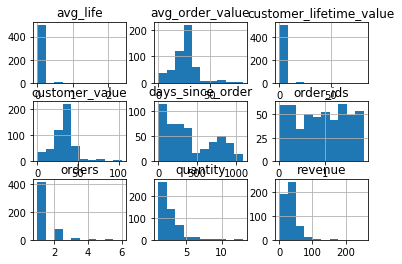

In [7]:
# Look at the distribution of all values
data.hist()

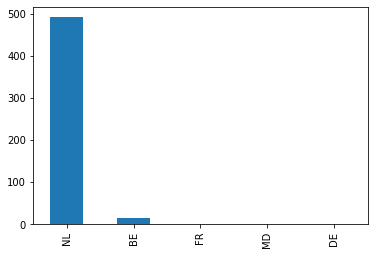

In [8]:
# Look at the country of sales
data.country.value_counts().plot(kind="bar")

In [9]:
# Calculate Purchase frequency
number_of_orders = np.sum(data["orders"])
number_of_customers = len(data)
purchase_frequency = number_of_orders / number_of_customers
data["purchase_frequency"] = data["orders"] / number_of_customers

# Repeat purchase rate
more_than_1_order = len(data[(data["orders"] > 1)])
repeat_rate = more_than_1_order / number_of_customers
# data["repeat_rate"] = data["orders"] / number_of_customers


# Churn rate
churn_rate = 1 - repeat_rate

print("purchase_frequency:",purchase_frequency)
print("repeat_rate:",repeat_rate)
print("churn_rate:",churn_rate)

purchase_frequency: 1.268627450980392
repeat_rate: 0.19215686274509805
churn_rate: 0.807843137254902


In [10]:
number_of_orders

647

In [11]:
# Calculate Average Order Value
data["avg_order_value"] = data["revenue"] / data["orders"]

# Calculate Profit Margin
## It is a given that the profit margin is 30% on all sales
data["profit_margin"] = data["revenue"]*0.30

# Customer Lifetime Value
data["clv"] = (data["avg_order_value"] * purchase_frequency) # / churn_rate
# data["clv"] = data["clv"] * data["profit_margin"]

data["clv"].mean()

32.99493537101116

## Prediction Model for CLTV
Here we are going to predict CLTV using Linear Regression Model.

In [12]:
# Extract month and year from last_order_date
data["month_year"] = data["last_order_date"].apply(lambda x: x.strftime("%b-%Y"))

# Transform to pivot
sales = data.pivot_table(index=["id"],columns=["month_year"],
                          values="revenue",aggfunc="sum",fill_value=0).reset_index()

sales.head(5)

month_year,id,Apr-2018,Apr-2019,Apr-2020,Aug-2017,Aug-2018,Aug-2019,Dec-2017,Dec-2018,Dec-2019,...,May-2020,Nov-2017,Nov-2018,Nov-2019,Oct-2017,Oct-2018,Oct-2019,Sep-2017,Sep-2018,Sep-2019
0,10062704806684911106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0
1,10084691437624698309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0
2,10126359774808738430,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0
3,10191985495019508703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,68.44,0.0
4,10222035376034696935,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0


In [13]:
# Sum all monthly sales
sales["CLV"] = sales.iloc[:,2:].sum(axis=1)
sales.head(5)

month_year,id,Apr-2018,Apr-2019,Apr-2020,Aug-2017,Aug-2018,Aug-2019,Dec-2017,Dec-2018,Dec-2019,...,Nov-2017,Nov-2018,Nov-2019,Oct-2017,Oct-2018,Oct-2019,Sep-2017,Sep-2018,Sep-2019,CLV
0,10062704806684911106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,33.02
1,10084691437624698309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,24.79
2,10126359774808738430,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,29.00
3,10191985495019508703,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,68.44,0.0,68.44
4,10222035376034696935,0.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.00,0.0,29.00


In [14]:
list(sales.columns[1:-1])

['Apr-2018',
 'Apr-2019',
 'Apr-2020',
 'Aug-2017',
 'Aug-2018',
 'Aug-2019',
 'Dec-2017',
 'Dec-2018',
 'Dec-2019',
 'Feb-2018',
 'Feb-2019',
 'Feb-2020',
 'Jan-2018',
 'Jan-2019',
 'Jan-2020',
 'Jul-2017',
 'Jul-2018',
 'Jul-2019',
 'Jun-2017',
 'Jun-2018',
 'Jun-2019',
 'Jun-2020',
 'Mar-2018',
 'Mar-2019',
 'Mar-2020',
 'May-2018',
 'May-2019',
 'May-2020',
 'Nov-2017',
 'Nov-2018',
 'Nov-2019',
 'Oct-2017',
 'Oct-2018',
 'Oct-2019',
 'Sep-2017',
 'Sep-2018',
 'Sep-2019']

In [15]:
# Selecting independent (x) and independent (y) variables
## First select all available months excluding id and clv column
months = list(sales.columns[1:-1])

X = sales[months]
y = sales[["CLV"]]

### Splitting the data into training set and test set
Let's split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state as a seed value to maintain reproducibility, which means whenever you split the data will not affect the results. Also, if random_state is None, then random number generator uses np.random for selecting records randomly. It means If you don't set a seed, it is different each time.

In [16]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

### Model Development
First, import the Linear Regression module and create a Linear Regression object. Then, fit your model on the train set using fit() function and perform prediction on the test set using predict() function.

In [17]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[1.77635684e-14]
[[6.91268139e-16 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]]


### How Well Does the Model Fit the data?
In order to evaluate the overall fit of the linear model, we use the R-squared value. R-squared is the proportion of variance explained by the model. Value of R-squared lies between 0 and 1. Higher value or R-squared is considered better because it indicates the larger variance explained by the model.

In [18]:
from sklearn import metrics

# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 1.0


In [19]:
# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))

#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4.7706880593728536e-14
MSE 4.549768727411831e-27
RMSE: 6.745197348789604e-14


In [20]:
# Export data to csv
data.to_csv("./data/data_clean.csv", index=False)

In [24]:
data.sort_values("avg_life",ascending=False)
data["customer_lifetime_value"].mean()

0.5756813857859376